# Cleanen und Auswerten

In [ ]:
import pandas as pd
Fehlzeiten = pd.read_excel("/content/drive/MyDrive/Fehlzeiten_final.xlsx")

In [ ]:
Fehlzeiten

,Last Name,First Name,Party,Datum,Full Name,Mutterschutz
0,Bareiß,Thomas,CDU/CSU,02.02. 2024,Thomas Bareiß,0
1,Beckamp,Roger,AfD,02.02. 2024,Roger Beckamp,0
2,Beyer,Peter,CDU/CSU,02.02. 2024,Peter Beyer,0
3,Bollmann,Gereon,AfD,02.02. 2024,Gereon Bollmann,0
4,Braun,Jürgen,AfD,02.02. 2024,Jürgen Braun,0
...,...,...,...,...,...,...
7589,Lehmann,Sylvia,SPD,26.10. 2021,Sylvia Lehmann,0
7590,Nestle,Dr. Ingrid,BÜNDNIS 90/ DIE GRÜNEN,26.10. 2021,Dr. Ingrid Nestle,0
7591,Ortleb,Josephine *,SPD,26.10. 2021,Jasmina Hostert,1
7592,Pohl,Jürgen,AfD,26.10. 2021,Jürgen Pohl,0


In [ ]:
Fehlzeiten.to_excel("Fehlzeiten_final_korrigiert.xlsx", index = False)
from google.colab import files
files.download("Fehlzeiten_final_korrigiert.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Fehlzeiten.at[7009, 'Full Name'] = "Martin Sichert"
Fehlzeiten.at[3864, 'Full Name'] = "Norbert Kleinwächter"
Fehlzeiten.at[7591, 'Full Name'] = "Josephine Ortleb"
Fehlzeiten.at[1177, 'Full Name'] = "Jessica Rosenthal"
Fehlzeiten.at[7059, 'Full Name'] = "Katrin Staffler"
Fehlzeiten.at[3855, 'Full Name'] = "Sonja Eichwede"
Fehlzeiten.at[1505, 'Full Name'] = "Nicolas Zippelius"
Fehlzeiten.at[1505, 'First Name'] = "Nicolas"
Fehlzeiten.at[1505, 'Last Name'] = "Zippelius"

In [ ]:
Fehlzeiten

# Überprüfung: bis einschließlich 50 alles korrekt

,Last Name,First Name,Party,Datum,Full Name,Mutterschutz
0,Bareiß,Thomas,CDU/CSU,02.02. 2024,Thomas Bareiß,0
1,Beckamp,Roger,AfD,02.02. 2024,Roger Beckamp,0
2,Beyer,Peter,CDU/CSU,02.02. 2024,Peter Beyer,0
3,Bollmann,Gereon,AfD,02.02. 2024,Gereon Bollmann,0
4,Braun,Jürgen,AfD,02.02. 2024,Jürgen Braun,0
...,...,...,...,...,...,...
7589,Lehmann,Sylvia,SPD,26.10. 2021,Sylvia Lehmann,0
7590,Nestle,Dr. Ingrid,BÜNDNIS 90/ DIE GRÜNEN,26.10. 2021,Dr. Ingrid Nestle,0
7591,Ortleb,Josephine *,SPD,26.10. 2021,Josephine Ortleb,1
7592,Pohl,Jürgen,AfD,26.10. 2021,Jürgen Pohl,0


In [ ]:
Abgeordnete = Fehlzeiten.groupby("Full Name")["Datum"].count()
Abgeordnete.head()

Full Name
Achim Post (Minden)    12
Adis Ahmetovic         10
Agnieszka Brugger       9
Albert Rupprecht        7
Albert Stegemann        1
Name: Datum, dtype: int64

In [ ]:
Abgeordnete = Fehlzeiten.groupby('Full Name')['Datum'].count().reset_index()

Abgeordnete_Partei = Fehlzeiten.groupby(['Full Name', 'Party'])['Datum'].count().reset_index()

merged_df_PA = pd.merge(Abgeordnete, Abgeordnete_Partei, on='Full Name', suffixes=('_total', '_party'))

# Mutterschutz

Abgeordnete_MS = Fehlzeiten.groupby("Full Name")["Mutterschutz"].sum().reset_index()

# Merge Mutterschutz und df

Abgeordnete_final = pd.merge(merged_df_PA, Abgeordnete_MS, on="Full Name", suffixes=("_total","_party"))


Abgeordnete_final

,Full Name,Datum_total,Party,Datum_party,Mutterschutz
0,Achim Post (Minden),12,SPD,12,0
1,Adis Ahmetovic,10,SPD,10,0
2,Agnieszka Brugger,9,BÜNDNIS 90/ DIE GRÜNEN,9,0
3,Albert Rupprecht,7,CDU/CSU,7,0
4,Albert Stegemann,1,CDU/CSU,1,0
...,...,...,...,...,...
704,Yasmin Fahimi,7,SPD,7,0
705,Ye-One Rhie,10,SPD,10,0
706,Yvonne Magwas,12,CDU/CSU,12,0
707,Zaklin Nastic,7,DIE LINKE,7,0


In [ ]:
Abgeordnete_final["Fraktionswechsel"] = Abgeordnete_final["Datum_total"] - Abgeordnete_final["Datum_party"]


In [ ]:
Abgeordnete_final

,Full Name,Datum_total,Party,Datum_party,Mutterschutz,Fraktionswechsel
0,Achim Post (Minden),12,SPD,12,0,0
1,Adis Ahmetovic,10,SPD,10,0,0
2,Agnieszka Brugger,9,BÜNDNIS 90/ DIE GRÜNEN,9,0,0
3,Albert Rupprecht,7,CDU/CSU,7,0,0
4,Albert Stegemann,1,CDU/CSU,1,0,0
...,...,...,...,...,...,...
704,Yasmin Fahimi,7,SPD,7,0,0
705,Ye-One Rhie,10,SPD,10,0,0
706,Yvonne Magwas,12,CDU/CSU,12,0,0
707,Zaklin Nastic,7,DIE LINKE,7,0,0


In [ ]:
Abgeordnete_final.to_excel("Fehlzeiten_Abgeordnete.xlsx", index = False)
from google.colab import files
files.download("Fehlzeiten_Abgeordnete.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Finales Ergebnis

Abgeordnete_final["Fehlzeiten ohne Mutterschutz"] = Abgeordnete_final["Datum_party"] - Abgeordnete_final["Mutterschutz"]
Abgeordnete_final

,Full Name,Datum_total,Party,Datum_party,Mutterschutz,Fraktionswechsel,Fehlzeiten ohne Mutterschutz
0,Achim Post (Minden),12,SPD,12,0,0,12
1,Adis Ahmetovic,10,SPD,10,0,0,10
2,Agnieszka Brugger,9,BÜNDNIS 90/ DIE GRÜNEN,9,0,0,9
3,Albert Rupprecht,7,CDU/CSU,7,0,0,7
4,Albert Stegemann,1,CDU/CSU,1,0,0,1
...,...,...,...,...,...,...,...
704,Yasmin Fahimi,7,SPD,7,0,0,7
705,Ye-One Rhie,10,SPD,10,0,0,10
706,Yvonne Magwas,12,CDU/CSU,12,0,0,12
707,Zaklin Nastic,7,DIE LINKE,7,0,0,7


In [ ]:
Fraktionen_om = Abgeordnete_final.groupby("Party")["Fehlzeiten ohne Mutterschutz"].sum().reset_index()
Fraktionen_om

,Party,Fehlzeiten ohne Mutterschutz
0,AfD,1213
1,BÜNDNIS 90/ DIE GRÜNEN,1246
2,CDU/CSU,1757
3,DIE LINKE,535
4,FDP,659
5,SPD,1765
6,fraktionslos,195


In [ ]:
Fraktionen_om["Fraktionsgröße"] = [78,118,197,38,92,207,6]

Fraktionen_om

,Party,Fehlzeiten ohne Mutterschutz,Fraktionsgröße
0,AfD,1213,78
1,BÜNDNIS 90/ DIE GRÜNEN,1246,118
2,CDU/CSU,1757,197
3,DIE LINKE,535,38
4,FDP,659,92
5,SPD,1765,207
6,fraktionslos,195,6


In [ ]:
Fraktionen_om["Fraktionsgröße x Sitzungen"] = Fraktionen_om["Fraktionsgröße"] * 152

In [ ]:
Fraktionen_om_copy = Fraktionen_om.copy()

In [ ]:
Fraktionen_om.at[3, 'Fraktionsgröße x Sitzungen'] = 38 * 142

In [ ]:
Fraktionen_om

,Party,Fehlzeiten ohne Mutterschutz,Fraktionsgröße,Fraktionsgröße x Sitzungen
0,AfD,1213,78,11856
1,BÜNDNIS 90/ DIE GRÜNEN,1246,118,17936
2,CDU/CSU,1757,197,29944
3,DIE LINKE,535,38,5396
4,FDP,659,92,13984
5,SPD,1765,207,31464
6,fraktionslos,195,6,912


In [ ]:
# Finales Ergebnis

Fraktionen_om["Fehlzeiten_in_Prozent"] = Fraktionen_om["Fehlzeiten ohne Mutterschutz"] / Fraktionen_om["Fraktionsgröße x Sitzungen"] * 100
Fraktionen_om

# Fraktionsgrößen: Ausgetretene Abgeordnete berücksichtigen?
# Ziemiak, 124. Sitzung

,Party,Fehlzeiten ohne Mutterschutz,Fraktionsgröße,Fraktionsgröße x Sitzungen,Fehlzeiten_in_Prozent
0,AfD,1213,78,11856,10.231107
1,BÜNDNIS 90/ DIE GRÜNEN,1246,118,17936,6.946922
2,CDU/CSU,1757,197,29944,5.867620
3,DIE LINKE,535,38,5396,9.914752
4,FDP,659,92,13984,4.712529
5,SPD,1765,207,31464,5.609586
6,fraktionslos,195,6,912,21.381579


In [ ]:
Fraktionen_om.to_excel("Fehlzeiten_Fraktionen.xlsx", index = False)
from google.colab import files
files.download("Fehlzeiten_Fraktionen.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Rechnen mit Fraktionen zu Beginn der Legislatur

# Fehler suchen

In [ ]:
Fehlzeiten

,Last Name,First Name,Party,Datum,Full Name,Mutterschutz
0,Bareiß,Thomas,CDU/CSU,02.02. 2024,Thomas Bareiß,0
1,Beckamp,Roger,AfD,02.02. 2024,Roger Beckamp,0
2,Beyer,Peter,CDU/CSU,02.02. 2024,Peter Beyer,0
3,Bollmann,Gereon,AfD,02.02. 2024,Gereon Bollmann,0
4,Braun,Jürgen,AfD,02.02. 2024,Jürgen Braun,0
...,...,...,...,...,...,...
7589,Lehmann,Sylvia,SPD,26.10. 2021,Sylvia Lehmann,0
7590,Nestle,Dr. Ingrid,BÜNDNIS 90/ DIE GRÜNEN,26.10. 2021,Dr. Ingrid Nestle,0
7591,Ortleb,Josephine *,SPD,26.10. 2021,Josephine Ortleb,1
7592,Pohl,Jürgen,AfD,26.10. 2021,Jürgen Pohl,0


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Full Name' and 'Last Name' are the column names

# Check if the pattern in 'Last Name' appears in 'Full Name'
Fehlzeiten['Pattern_In_Full_Name'] = Fehlzeiten.apply(lambda row: row['Last Name'] in row['Full Name'], axis=1)

# Display rows where the pattern in 'Last Name' does not appear in 'Full Name'
mistakes = Fehlzeiten[~Fehlzeiten['Pattern_In_Full_Name']]

# Display the potential mistakes
print(mistakes)


Empty DataFrame
Columns: [Last Name, First Name, Party, Datum, Full Name, Mutterschutz, Pattern_In_Full_Name]
Index: []


# Über Zeit


In [ ]:
Fehlzeiten

,Last Name,First Name,Party,Datum,Full Name,Mutterschutz,Pattern_In_Full_Name
0,Bareiß,Thomas,CDU/CSU,02.02. 2024,Thomas Bareiß,0,True
1,Beckamp,Roger,AfD,02.02. 2024,Roger Beckamp,0,True
2,Beyer,Peter,CDU/CSU,02.02. 2024,Peter Beyer,0,True
3,Bollmann,Gereon,AfD,02.02. 2024,Gereon Bollmann,0,True
4,Braun,Jürgen,AfD,02.02. 2024,Jürgen Braun,0,True
...,...,...,...,...,...,...,...
7589,Lehmann,Sylvia,SPD,26.10. 2021,Sylvia Lehmann,0,True
7590,Nestle,Dr. Ingrid,BÜNDNIS 90/ DIE GRÜNEN,26.10. 2021,Dr. Ingrid Nestle,0,True
7591,Ortleb,Josephine *,SPD,26.10. 2021,Josephine Ortleb,1,True
7592,Pohl,Jürgen,AfD,26.10. 2021,Jürgen Pohl,0,True


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Date' is the name of the column containing dates in German format

# Convert dates to datetime format using the specified German format
Fehlzeiten['Datum'] = pd.to_datetime(Fehlzeiten['Datum'], format='%d.%m. %Y')

# Convert dates to American format
Fehlzeiten['Datum'] = Fehlzeiten['Datum'].dt.strftime('%m/%d/%Y')

# Display the modified DataFrame
print(Fehlzeiten)


     Last Name   First Name                   Party       Datum  \
0       Bareiß       Thomas                 CDU/CSU  02/02/2024   
1      Beckamp        Roger                     AfD  02/02/2024   
2        Beyer        Peter                 CDU/CSU  02/02/2024   
3     Bollmann       Gereon                     AfD  02/02/2024   
4        Braun       Jürgen                     AfD  02/02/2024   
...        ...          ...                     ...         ...   
7589   Lehmann       Sylvia                     SPD  10/26/2021   
7590    Nestle   Dr. Ingrid  BÜNDNIS 90/ DIE GRÜNEN  10/26/2021   
7591    Ortleb  Josephine *                     SPD  10/26/2021   
7592      Pohl       Jürgen                     AfD  10/26/2021   
7593      Witt          Uwe                     AfD  10/26/2021   

              Full Name  Mutterschutz  Pattern_In_Full_Name  
0         Thomas Bareiß             0                  True  
1         Roger Beckamp             0                  True  
2        

In [ ]:

# Count the occurrences of each date in the 'Date' column
date_counts = Fehlzeiten['Datum'].value_counts()

# Create a new DataFrame with unique dates and their corresponding counts
new_df = pd.DataFrame({'Datum': date_counts.index, 'Count': date_counts.values})

# Display the new DataFrame
new_df


,Datum,Count
0,03/25/2022,93
1,10/14/2022,93
2,02/27/2022,87
3,11/17/2023,84
4,03/22/2022,83
...,...,...
147,12/08/2021,24
148,06/14/2023,22
149,05/10/2023,21
150,12/15/2021,20


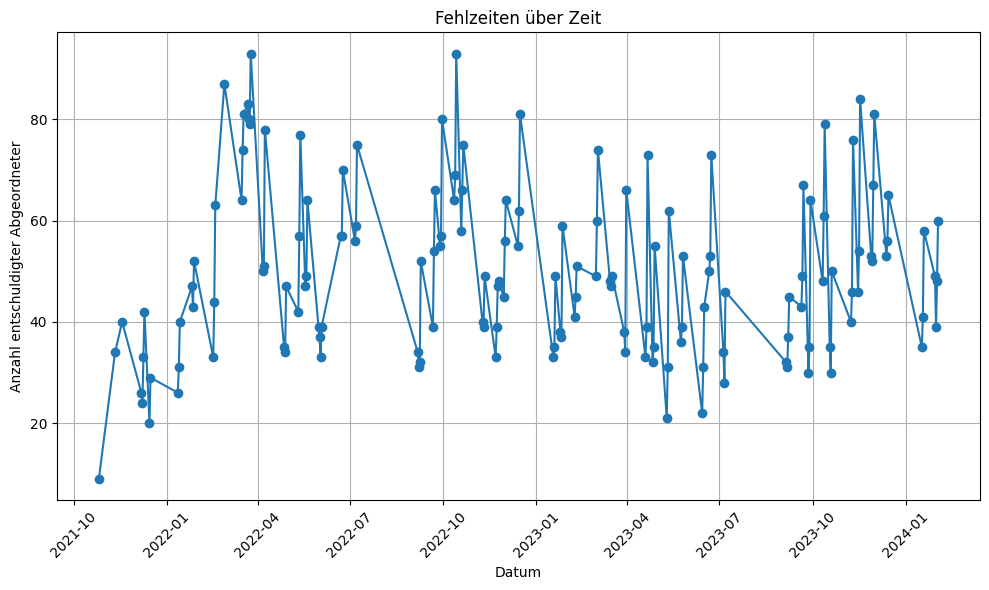

In [ ]:
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame with 'Date' and 'Count' columns

# Convert 'Date' column to datetime
new_df['Datum'] = pd.to_datetime(new_df['Datum'])

# Sort DataFrame by 'Date'
new_df = new_df.sort_values('Datum')

# Plot the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(new_df['Datum'], new_df['Count'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Datum')
plt.ylabel('Anzahl entschuldigter Abgeordneter')
plt.title('Fehlzeiten über Zeit')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


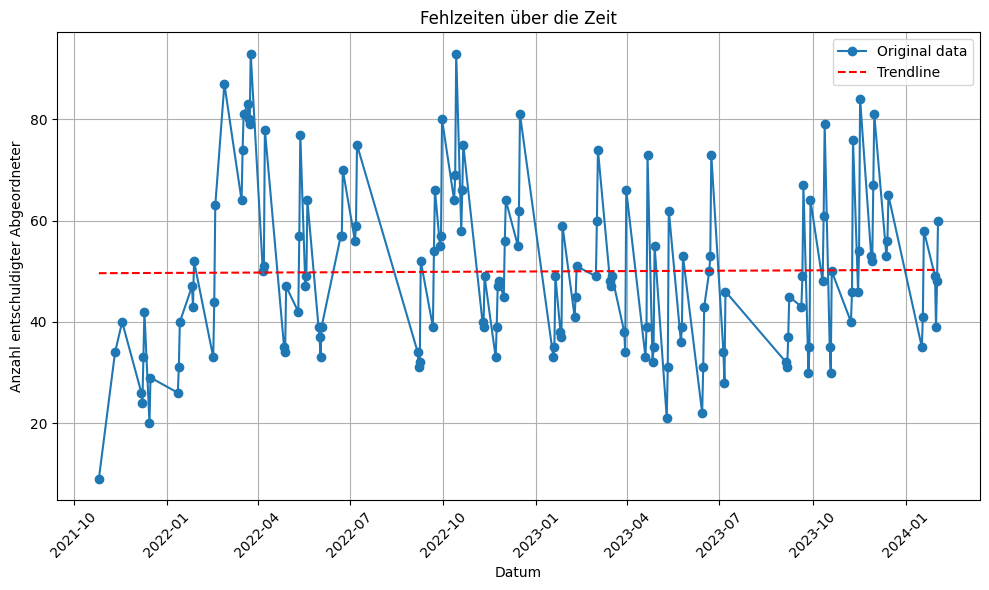

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming new_df is your DataFrame with 'Date' and 'Count' columns

# Convert 'Date' column to datetime
new_df['Datum'] = pd.to_datetime(new_df['Datum'])

# Sort DataFrame by 'Date'
new_df = new_df.sort_values('Datum')

# Extracting numerical representation of dates (days since epoch)
dates_num = new_df['Datum'].map(lambda date: date.toordinal())

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(np.array(dates_num).reshape(-1, 1), new_df['Count'])

# Predict counts using the regression model
predicted_counts = regressor.predict(np.array(dates_num).reshape(-1, 1))

# Plot the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(new_df['Datum'], new_df['Count'], marker='o', linestyle='-', label='Original data')
plt.plot(new_df['Datum'], predicted_counts, color='red', linestyle='--', label='Trendline')

# Set labels, title, and legend
plt.xlabel('Datum')
plt.ylabel('Anzahl entschuldigter Abgeordneter')
plt.title('Fehlzeiten über die Zeit')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


# **Ab hier nicht mehr wichtig**

In [ ]:
Abgeordnete_df = Abgeordnete.reset_index()
Abgeordnete_df

,index,Full Name,Datum
0,0,Achim Post (Minden),12
1,1,Adis Ahmetovic,10
2,2,Agnieszka Brugger,9
3,3,Albert Rupprecht,7
4,4,Albert Stegemann,1
...,...,...,...
694,694,Yasmin Fahimi,7
695,695,Ye-One Rhie,10
696,696,Yvonne Magwas,12
697,697,Zaklin Nastic,7


In [ ]:
Mutterschutz = Fehlzeiten.groupby("Full Name")["Mutterschutz"].sum()
Mutterschutz.head()

Full Name
Achim Post (Minden)    0
Adis Ahmetovic         0
Agnieszka Brugger      0
Albert Rupprecht       0
Albert Stegemann       0
Name: Mutterschutz, dtype: int64

In [ ]:
Mutterschutz_df = Mutterschutz.reset_index()
Mutterschutz_df

,Full Name,Mutterschutz
0,Achim Post (Minden),0
1,Adis Ahmetovic,0
2,Agnieszka Brugger,0
3,Albert Rupprecht,0
4,Albert Stegemann,0
...,...,...
694,Yasmin Fahimi,0
695,Ye-One Rhie,0
696,Yvonne Magwas,0
697,Zaklin Nastic,0


In [ ]:
Abgeordnete_f = pd.merge(left = Abgeordnete_df,
                        right = Mutterschutz_df,
                        left_on = 'Full Name',
                        right_on = 'Full Name',
                        how = 'inner')

In [ ]:
Abgeordnete_f["Fehlzeiten ohne Mutterschutz"] = Abgeordnete_f["Datum"] - Abgeordnete_f["Mutterschutz"]
Abgeordnete_f

,index,Full Name,Datum,Mutterschutz,Fehlzeiten ohne Mutterschutz
0,0,Achim Post (Minden),12,0,12
1,1,Adis Ahmetovic,10,0,10
2,2,Agnieszka Brugger,9,0,9
3,3,Albert Rupprecht,7,0,7
4,4,Albert Stegemann,1,0,1
...,...,...,...,...,...
694,694,Yasmin Fahimi,7,0,7
695,695,Ye-One Rhie,10,0,10
696,696,Yvonne Magwas,12,0,12
697,697,Zaklin Nastic,7,0,7


In [ ]:
Fehlzeiten_unique = Fehlzeiten.drop_duplicates(subset="Full Name")

In [ ]:
Abgeordnete_fi = pd.merge(left = Abgeordnete_f,
                          right = Fehlzeiten_unique,
                          left_on = 'Full Name',
                          right_on = 'Full Name',
                          how = 'inner')


In [ ]:
Abgeordnete_fi

,index,Full Name,Datum_x,Mutterschutz_x,Fehlzeiten ohne Mutterschutz,Last Name,First Name,Party,Datum_y,Mutterschutz_y,Pattern_In_Full_Name
0,0,Achim Post (Minden),12,0,12,Post (Minden),Achim,SPD,12/14/2023,0,True
1,1,Adis Ahmetovic,10,0,10,Ahmetovic,Adis,SPD,09/22/2023,0,True
2,2,Agnieszka Brugger,9,0,9,Brugger,Agnieszka,BÜNDNIS 90/ DIE GRÜNEN,09/29/2023,0,True
3,3,Albert Rupprecht,7,0,7,Rupprecht,Albert,CDU/CSU,10/21/2022,0,True
4,4,Albert Stegemann,1,0,1,Stegemann,Albert,CDU/CSU,04/06/2022,0,True
...,...,...,...,...,...,...,...,...,...,...,...
694,694,Yasmin Fahimi,7,0,7,Fahimi,Yasmin,SPD,05/20/2022,0,True
695,695,Ye-One Rhie,10,0,10,Rhie,Ye-One,SPD,03/17/2023,0,True
696,696,Yvonne Magwas,12,0,12,Magwas,Yvonne,CDU/CSU,03/31/2023,0,True
697,697,Zaklin Nastic,7,0,7,Nastic,Zaklin,DIE LINKE,05/24/2023,0,True


In [ ]:
Abgeordnete_fi = Abgeordnete_fi.drop(columns=["Datum_y","Mutterschutz_y"])

In [ ]:
Abgeordnete_fi.to_excel("Fehlzeiten_Abgeordnete.xlsx", index = False)
from google.colab import files
files.download("Fehlzeiten_Abgeordnete.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Abgeordnete_fi

,index,Full Name,Datum_x,Mutterschutz_x,Fehlzeiten ohne Mutterschutz,Last Name,First Name,Party,Pattern_In_Full_Name
0,0,Achim Post (Minden),12,0,12,Post (Minden),Achim,SPD,True
1,1,Adis Ahmetovic,10,0,10,Ahmetovic,Adis,SPD,True
2,2,Agnieszka Brugger,9,0,9,Brugger,Agnieszka,BÜNDNIS 90/ DIE GRÜNEN,True
3,3,Albert Rupprecht,7,0,7,Rupprecht,Albert,CDU/CSU,True
4,4,Albert Stegemann,1,0,1,Stegemann,Albert,CDU/CSU,True
...,...,...,...,...,...,...,...,...,...
694,694,Yasmin Fahimi,7,0,7,Fahimi,Yasmin,SPD,True
695,695,Ye-One Rhie,10,0,10,Rhie,Ye-One,SPD,True
696,696,Yvonne Magwas,12,0,12,Magwas,Yvonne,CDU/CSU,True
697,697,Zaklin Nastic,7,0,7,Nastic,Zaklin,DIE LINKE,True


In [ ]:
Fraktionen = Abgeordnete_fi.groupby("Party")["Datum_x"].sum()
Fraktionen_df = Fraktionen.reset_index()
Fraktionen_df

,Party,Datum_x
0,AfD,1182
1,BÜNDNIS 90/ DIE GRÜNEN,1268
2,CDU/CSU,1809
3,DIE LINKE,351
4,FDP,701
5,SPD,1873
6,fraktionslos,410


In [ ]:
Fraktionen_om = Abgeordnete_fi.groupby("Party")["Fehlzeiten ohne Mutterschutz"].sum()
Fraktionen_om_df = Fraktionen_om.reset_index()
Fraktionen_om_df

,Party,Fehlzeiten ohne Mutterschutz
0,AfD,1182
1,BÜNDNIS 90/ DIE GRÜNEN,1246
2,CDU/CSU,1757
3,DIE LINKE,351
4,FDP,659
5,SPD,1765
6,fraktionslos,410


In [ ]:
Fraktionen_om_df["Fraktionsgröße"] = [78,118,197,38,92,207,6]
Fraktionen_om_df

,Party,Fehlzeiten ohne Mutterschutz,Fraktionsgröße
0,AfD,1182,78
1,BÜNDNIS 90/ DIE GRÜNEN,1246,118
2,CDU/CSU,1757,197
3,DIE LINKE,351,38
4,FDP,659,92
5,SPD,1765,207
6,fraktionslos,410,6


In [ ]:
Fraktionen_om_df["Abgeordnete_x_Sitzungen"] = Fraktionen_om_df["Fraktionsgröße"] * 152

In [ ]:
Fraktionen_om_df

,Party,Fehlzeiten ohne Mutterschutz,Fraktionsgröße,Abgeordnete_x_Sitzungen
0,AfD,1182,78,11856
1,BÜNDNIS 90/ DIE GRÜNEN,1246,118,17936
2,CDU/CSU,1757,197,29944
3,DIE LINKE,351,38,5776
4,FDP,659,92,13984
5,SPD,1765,207,31464
6,fraktionslos,410,6,912


In [ ]:
Fraktionen_om_df.to_excel("Fehlzeiten_Fraktionen.xlsx", index = False)
from google.colab import files
files.download("Fehlzeiten_Fraktionen.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Fraktionen_om_df["Fehlzeiten_in_Prozent"] = Fraktionen_om_df["Fehlzeiten ohne Mutterschutz"] / Fraktionen_om_df["Abgeordnete_x_Sitzungen"] * 100
Fraktionen_om_df

,Party,Fehlzeiten ohne Mutterschutz,Fraktionsgröße,Abgeordnete_x_Sitzungen,Fehlzeiten_in_Prozent
0,AfD,1182,78,11856,9.969636
1,BÜNDNIS 90/ DIE GRÜNEN,1246,118,17936,6.946922
2,CDU/CSU,1757,197,29944,5.867620
3,DIE LINKE,351,38,5776,6.076870
4,FDP,659,92,13984,4.712529
5,SPD,1765,207,31464,5.609586
6,fraktionslos,410,6,912,44.956140


In [ ]:
Fraktionsgroeße = pd.read_excel("/content/drive/MyDrive/Fraktionsgrößen.xlsx")
Fraktionsgroeße

,Fraktion,Abgeordnete
0,AfD,78.0
1,SPD,207.0
2,CDU/CSU,197.0
3,BÜNDNIS 90/ DIE GRÜNEN,118.0
4,FDP,92.0
5,DIE LINKE,NaN
6,fraktionslos,6.0


In [ ]:
Fraktionen_groeße = pd.merge(left = Fraktionen_om,
                    right = Fraktionsgroeße,
                    left_on = 'Party',
                    right_on = 'Fraktion',
                    how = 'inner')

Fraktionen_groeße

,Fehlzeiten ohne Mutterschutz,Fraktion,Abgeordnete
0,1182,AfD,78.0
1,1757,CDU/CSU,197.0
2,351,DIE LINKE,NaN
3,659,FDP,92.0
4,1765,SPD,207.0
5,410,fraktionslos,6.0


In [ ]:
Fehlzeiten.head()

,Last Name,First Name,Party,Datum,Full Name,Mutterschutz,Pattern_In_Full_Name
0,Bareiß,Thomas,CDU/CSU,02/02/2024,Thomas Bareiß,0,True
1,Beckamp,Roger,AfD,02/02/2024,Roger Beckamp,0,True
2,Beyer,Peter,CDU/CSU,02/02/2024,Peter Beyer,0,True
3,Bollmann,Gereon,AfD,02/02/2024,Gereon Bollmann,0,True
4,Braun,Jürgen,AfD,02/02/2024,Jürgen Braun,0,True
